In [1]:
import Pkg
Pkg.activate(".")
Pkg.add(["DataDrivenDiffEq","DataDrivenSparse","ModelingToolkit","OrdinaryDiffEq","Plots"])

  Activating project at `~/Desktop/SigmaCamp 2023`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/SigmaCamp 2023/Project.toml`
  No Changes to `~/Desktop/SigmaCamp 2023/Manifest.toml`


In [2]:
using DataDrivenDiffEq
using ModelingToolkit
using OrdinaryDiffEq
using DataDrivenSparse
using LinearAlgebra
using Plots

In [3]:
# Create a test problem
function lorenz(u, p, t)
    x, y, z = u

    ẋ = 10.0 * (y - x)
    ẏ = x * (28.0 - z) - y
    ż = x * y - (8 / 3) * z
    return [ẋ, ẏ, ż]
end

lorenz (generic function with 1 method)

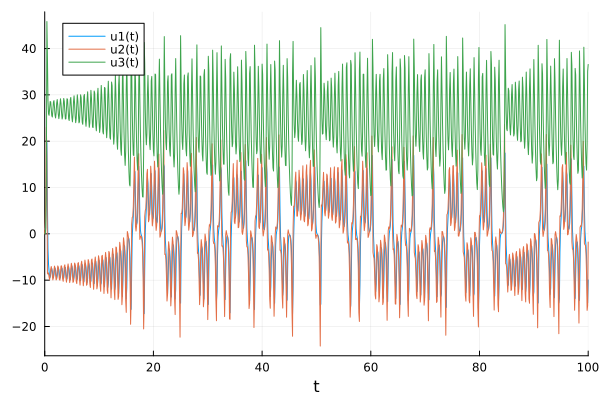

In [4]:
u0 = [1.0; 0.0; 0.0]
tspan = (0.0, 100.0)
dt = 0.1
prob = ODEProblem(lorenz, u0, tspan)
sol = solve(prob, Tsit5(), saveat = dt)
plot(sol)

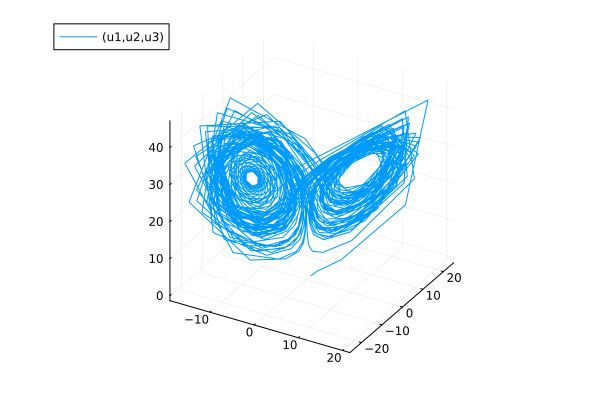

In [5]:
plot(sol, idxs = (1, 2, 3))

In [6]:
## Start the automatic discovery
ddprob = DataDrivenProblem(sol)

@variables t x(t) y(t) z(t)
u = [x; y; z]
basis = Basis(polynomial_basis(u, 5), u, iv = t)

Model ##Basis#310 with 56 equations
States (3):
  x(t)
  y(t)
  z(t)
Parameters (0):

In [7]:
opt = STLSQ(exp10.(-5:0.1:-1))
ddsol = solve(ddprob, basis, opt, options = DataDrivenCommonOptions(digits = 1))

"DataDrivenSolution{Float64}"

In [8]:
get_basis(ddsol)

Model ##Basis#313 with 3 equations
States (3):
  x(t)
  y(t)
  z(t)
Parameters (7):
  p₁
  p₂
  p₃
  p₄
  p₅
  p₆
⋮

In [9]:
ddsol.prob.p

7-element Vector{Float64}:
 -9.9
  9.9
 27.9
 -0.9
 -0.9
  0.9
 -2.6